<a href="https://colab.research.google.com/github/thiviyan98/ThiviyanNanthakumarCE888/blob/master/Assignment1/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 1

In [0]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


##Import and Reading Dataset

In [0]:
africadf = pd.read_csv('https://raw.githubusercontent.com/thiviyan98/ThiviyanNanthakumarCE888/master/Assignment1/Data/african-country-recession-dataset-2000-to-2017/africa_recession.csv', sep=',', quotechar='"')

medicaldf = pd.read_csv('https://raw.githubusercontent.com/thiviyan98/ThiviyanNanthakumarCE888/master/Assignment1/Data/noshowappointments/KaggleV2-May-2016.csv', sep=',', quotechar='"')

conceptdf = pd.read_csv('https://raw.githubusercontent.com/thiviyan98/ThiviyanNanthakumarCE888/master/Assignment1/Data/Contraceptive%20Method%20Choice%20Data%20Set/ContraceptiveMethodChoiceDataSet.csv', sep=',', quotechar='"')


### Printing and getting info for Africa Dataset

In [201]:
print(africadf)

           pop        emp  ...  fish_change  growthbucket
0    28.849621   6.914298  ...     0.007576             0
1    45.728313  13.623806  ...     0.007576             0
2    33.262043  13.323813  ...     0.007576             0
3     8.025703   3.869000  ...     0.007576             0
4     1.061468   0.243000  ...     0.007576             0
..         ...        ...  ...          ...           ...
481  12.208407   6.215000  ...     0.026477             0
482  29.784193  15.389316  ...     0.026477             1
483  55.797787  25.301973  ...     0.026477             0
484  15.850567   5.277823  ...     0.026477             0
485   7.797694   3.468000  ...     0.026477             0

[486 rows x 50 columns]


In [202]:
africadf.info()
#checked if there is missing values from the coloumn
#486 entries lot of data, 50 variable coloumns (features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 50 columns):
pop                       486 non-null float64
emp                       486 non-null float64
emp_to_pop_ratio          486 non-null float64
hc                        486 non-null float64
ccon                      486 non-null float64
cda                       486 non-null float64
cn                        486 non-null float64
ck                        486 non-null float64
ctfp                      486 non-null float64
cwtfp                     486 non-null float64
rconna                    486 non-null float64
rdana                     486 non-null float64
rnna                      486 non-null float64
rkna                      486 non-null float64
rtfpna                    486 non-null float64
rwtfpna                   486 non-null float64
labsh                     486 non-null float64
irr                       486 non-null float64
delta                     486 non-null float64
xr

In [203]:
#Double check if there is missing values
africadf.isnull().any().sum()>0

False

Adding ID

In [204]:
countryID=np.array(range(len(africadf)))

africadf['CountryID']=countryID

print(africadf)

           pop        emp  ...  growthbucket  CountryID
0    28.849621   6.914298  ...             0          0
1    45.728313  13.623806  ...             0          1
2    33.262043  13.323813  ...             0          2
3     8.025703   3.869000  ...             0          3
4     1.061468   0.243000  ...             0          4
..         ...        ...  ...           ...        ...
481  12.208407   6.215000  ...             0        481
482  29.784193  15.389316  ...             1        482
483  55.797787  25.301973  ...             0        483
484  15.850567   5.277823  ...             0        484
485   7.797694   3.468000  ...             0        485

[486 rows x 51 columns]


In [205]:
africadf['growthbucket'].value_counts() ##finding the target variable 

0    448
1     38
Name: growthbucket, dtype: int64

### Printing and getting info for Medical Dataset

In [206]:
print(medicaldf)

           PatientId  AppointmentID Gender  ... Handcap SMS_received  No-show
0       2.987250e+13        5642903      F  ...       0            0       No
1       5.589978e+14        5642503      M  ...       0            0       No
2       4.262962e+12        5642549      F  ...       0            0       No
3       8.679512e+11        5642828      F  ...       0            0       No
4       8.841186e+12        5642494      F  ...       0            0       No
...              ...            ...    ...  ...     ...          ...      ...
110522  2.572134e+12        5651768      F  ...       0            1       No
110523  3.596266e+12        5650093      F  ...       0            1       No
110524  1.557663e+13        5630692      F  ...       0            1       No
110525  9.213493e+13        5630323      F  ...       0            1       No
110526  3.775115e+14        5629448      F  ...       0            1       No

[110527 rows x 14 columns]


In [207]:
medicaldf.info()
#checked if there is missing values from the coloumn
#110527 entries lot of data, 14 variable coloumns (features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [208]:
#Double check if there is missing values
medicaldf.isnull().any().sum()>0

False

####Cleaning up the data

In [209]:
medicaldf[["Gender"]]=medicaldf[["Gender"]].apply(LabelEncoder().fit_transform) # 0 is female 1 is male

medicaldf[['Neighbourhood']]=medicaldf[['Neighbourhood']].apply(LabelEncoder().fit_transform) # see which neighbourhood missed most

medicaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null int64
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null int64
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(10), object(3)
memory usage: 11.8+ MB


#### Changing the Target Class to Binary Representation

In [210]:
medicaldf['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [211]:
# binary classification 1 is No and 0 is Yes
medicaldf['No-show']=[0 if b== 'Yes' else 1 for b in medicaldf['No-show']]
medicaldf['No-show'].value_counts()

1    88208
0    22319
Name: No-show, dtype: int64

In [212]:
print(medicaldf)

           PatientId  AppointmentID  Gender  ... Handcap SMS_received  No-show
0       2.987250e+13        5642903       0  ...       0            0        1
1       5.589978e+14        5642503       1  ...       0            0        1
2       4.262962e+12        5642549       0  ...       0            0        1
3       8.679512e+11        5642828       0  ...       0            0        1
4       8.841186e+12        5642494       0  ...       0            0        1
...              ...            ...     ...  ...     ...          ...      ...
110522  2.572134e+12        5651768       0  ...       0            1        1
110523  3.596266e+12        5650093       0  ...       0            1        1
110524  1.557663e+13        5630692       0  ...       0            1        1
110525  9.213493e+13        5630323       0  ...       0            1        1
110526  3.775115e+14        5629448       0  ...       0            1        1

[110527 rows x 14 columns]


### Printing and getting info for Contraceptive Dataset

In [213]:
print(conceptdf)

      Wife's Age  Wife's education  ...  Media exposure   Contraceptive method used
0             24                 2  ...                0                          1
1             45                 1  ...                0                          1
2             43                 2  ...                0                          1
3             42                 3  ...                0                          1
4             36                 3  ...                0                          1
...          ...               ...  ...              ...                        ...
1468          33                 4  ...                0                          3
1469          33                 4  ...                0                          3
1470          39                 3  ...                0                          3
1471          33                 3  ...                0                          3
1472          17                 3  ...                0                    

In [214]:
conceptdf.info()
#checked if there is missing values from the coloumn
#1473 entries lot of data, 10 variable coloumns (features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
Wife's Age                      1473 non-null int64
Wife's education                1473 non-null int64
Husband's education             1473 non-null int64
Number of children ever born    1473 non-null int64
Wife's religion                 1473 non-null int64
Wife's now working?             1473 non-null int64
Husband's occupation            1473 non-null int64
Standard-of-living index        1473 non-null int64
Media exposure                  1473 non-null int64
Contraceptive method used       1473 non-null int64
dtypes: int64(10)
memory usage: 115.2 KB


In [215]:
#Double check if there is missing values
conceptdf.isnull().any().sum()>0

False

####Adding ID for each wife



In [216]:
ID=np.array(range(len(conceptdf)))

conceptdf['ID']=ID

print(conceptdf)

      Wife's Age  Wife's education  ...  Contraceptive method used    ID
0             24                 2  ...                          1     0
1             45                 1  ...                          1     1
2             43                 2  ...                          1     2
3             42                 3  ...                          1     3
4             36                 3  ...                          1     4
...          ...               ...  ...                        ...   ...
1468          33                 4  ...                          3  1468
1469          33                 4  ...                          3  1469
1470          39                 3  ...                          3  1470
1471          33                 3  ...                          3  1471
1472          17                 3  ...                          3  1472

[1473 rows x 11 columns]


#### Changing the Target Class to Binary Representation

In [217]:
conceptdf['Contraceptive method used'].value_counts()

1    629
3    511
2    333
Name: Contraceptive method used, dtype: int64

In [218]:
# binary classification 0 is not used and 1 is used contraceptive
conceptdf['Contraceptive method used']=[0 if b== 1 else 1 for b in conceptdf['Contraceptive method used']]
conceptdf['Contraceptive method used'].value_counts()


1    844
0    629
Name: Contraceptive method used, dtype: int64

In [219]:
print(conceptdf)

      Wife's Age  Wife's education  ...  Contraceptive method used    ID
0             24                 2  ...                          0     0
1             45                 1  ...                          0     1
2             43                 2  ...                          0     2
3             42                 3  ...                          0     3
4             36                 3  ...                          0     4
...          ...               ...  ...                        ...   ...
1468          33                 4  ...                          1  1468
1469          33                 4  ...                          1  1469
1470          39                 3  ...                          1  1470
1471          33                 3  ...                          1  1471
1472          17                 3  ...                          1  1472

[1473 rows x 11 columns]


##Checking the imbalance

###Bar Graph for distribution

The distributions shows how skewed these features are. 

#####Africa Dataset

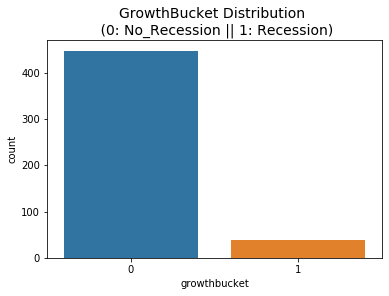

In [220]:
plt.title('GrowthBucket Distribution \n (0: No_Recession || 1: Recession)', fontsize=14)
sns.countplot("growthbucket",data=africadf)

#####Medical Dataset

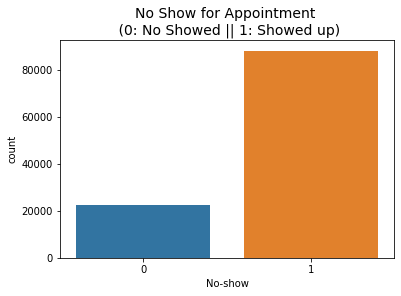

In [221]:
plt.title('No Show for Appointment \n (0: No Showed || 1: Showed up)', fontsize=14)
sns.countplot("No-show",data=medicaldf)

#####Contraceptive Dataset

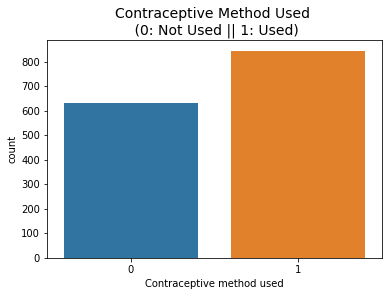

In [222]:
plt.title('Contraceptive Method Used \n (0: Not Used || 1: Used)', fontsize=14)
sns.countplot("Contraceptive method used",data=conceptdf)

###Pie Chart Representing Percentage of Imbalance


####Africa Dataset


In [223]:
recession= len(africadf[africadf['growthbucket']==1])
no_recession=len(africadf[africadf['growthbucket']==0])

percentofrecession= recession/(recession+no_recession)
percentofnorecession= no_recession/(recession+no_recession)

print("Percentage of Recession is", percentofrecession*100)
print("Percentage of No Recession is", percentofnorecession*100)


Percentage of Recession is 7.818930041152264
Percentage of No Recession is 92.18106995884774


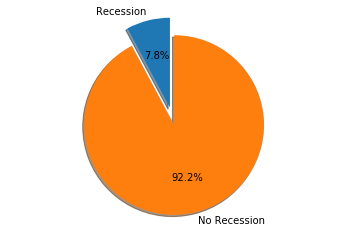

In [224]:

labels = 'Recession','No Recession'

sizes=[percentofrecession,percentofnorecession]

explode=(0.2,0)

fig1, ax1 =plt.subplots()

ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%', shadow= True, startangle=90)

ax1.axis('equal')

plt.show()

####Medical Dataset

In [225]:
noshow= len(medicaldf[medicaldf['No-show']==0])
show=len(medicaldf[medicaldf['No-show']==1])

percentofnoshow= noshow/(show+noshow)
percentofshow=show/(show+noshow)

print("Percentage of No Show is", percentofnoshow*100)
print("Percentage of Show is", percentofshow*100)

Percentage of No Show is 20.193255946510806
Percentage of Show is 79.8067440534892


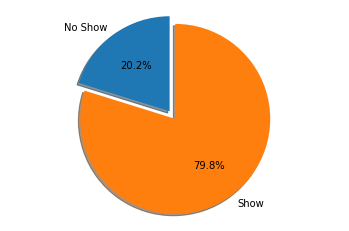

In [226]:
labels = 'No Show','Show'

sizes=[percentofnoshow,percentofshow]

explode=(0.1,0)

fig1, ax1 =plt.subplots()

ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%', shadow= True, startangle=90)

ax1.axis('equal')

plt.show()

####Contraceptive Dataset

In [227]:
noused= len(conceptdf[conceptdf['Contraceptive method used']==0])
used=len(conceptdf[conceptdf['Contraceptive method used']==1])

percentofnoused= noused/(used+noused)
percentofused=used/(used+noused)

print("Percentage of No Use is", percentofnoused*100)
print("Percentage of used is", percentofused*100)

Percentage of No Use is 42.701968771215206
Percentage of used is 57.298031228784794


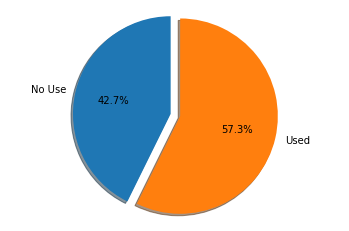

In [228]:
labels = 'No Use','Used'

sizes=[percentofnoused,percentofused]

explode=(0.1,0)

fig1, ax1 =plt.subplots()

ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%', shadow= True, startangle=90)

ax1.axis('equal')

plt.show()

##Inspection of Dataset

###Africa Dataset

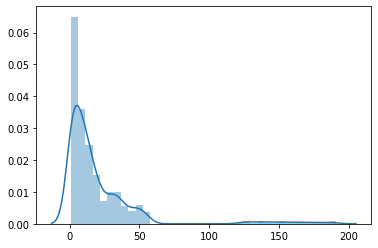

In [254]:
##Distribution of the population of the countries
population=africadf['pop'].values
sns.distplot(population)

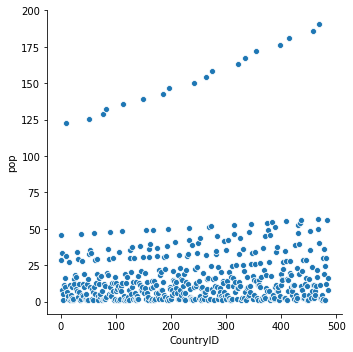

In [258]:
## the population of each country in scatter graph form
sns.relplot(x="CountryID", y="pop",data=africadf);


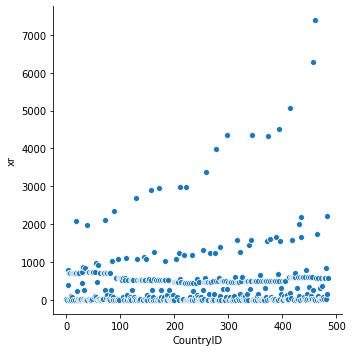

In [260]:
# countries currency exchange 
sns.relplot(x="CountryID", y="xr",data=africadf);


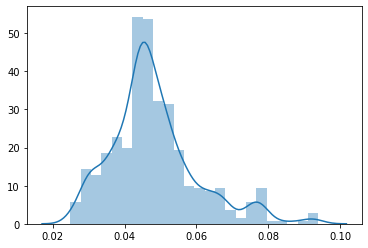

In [263]:
depreciationofcaptialstock=africadf['delta'].values
sns.distplot(depreciationofcaptialstock)

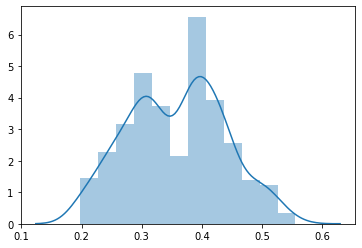

In [265]:
##distribution of the countries employment rate
employed=africadf['emp_to_pop_ratio'].values
sns.distplot(employed)

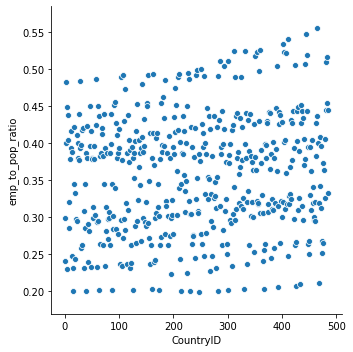

In [266]:
sns.relplot(x="CountryID", y="emp_to_pop_ratio",data=africadf);

###Medical Dataset

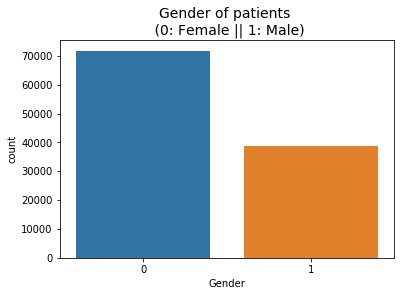

In [268]:
plt.title('Gender of patients \n (0: Female || 1: Male)', fontsize=14)
sns.countplot("Gender",data=medicaldf)

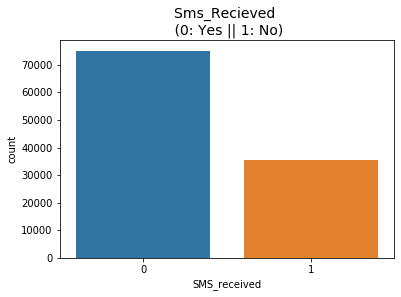

In [276]:
plt.title('Sms_Recieved \n (0: Yes || 1: No)', fontsize=14)
sns.countplot("SMS_received",data=medicaldf)

###Contraceptive Dataset